<a href="https://colab.research.google.com/github/carabiasjulio/fyea/blob/main/fyea_03_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datos numéricos con matrices Numpy**

Ahora vamos a introducir un par de herramientas de Scipy y Matplotlib para el procesamiento básico de datos y visualización.

En este caso, teníamos un conjunto de datos muy pequeño y simple -aproximadamente 100 números diferentes- por lo que el rendimiento no era un problema. Sin embargo, a medida que los conjuntos de datos crecen, la sobrecarga de usar Python en comparación con un lenguaje compilado como C ++ comienza a mostrar.

Por ejemplo, si quisiéramos procesar una imagen de fondo de escritorio (de 1280 x 1024 píxeles), acceder a cada píxel supondría bastantes pasos. Si quisiéramos hacer algo como aplicar un desenfoque gaussiano a una pequeña zona de cada píxel mediante una convolución, ¡habríamos incrementado el número de pasos en un orden de magnitud!

Otro ejemplo: si intentamos escalonar en el tiempo una EDP hiperbólica, como una ecuación de advección, utilizando un método de diferencias finitas con una malla fina, tendremos que realizar un número potencialmente elevado de operaciones por paso, por lo que nos gustaría hacerlo lo más rápido posible para obtener algún tipo de evolución a largo plazo.

Para superar esto, vamos a introducir matrices Numpy como una manera de acercarse a un rendimiento de nivel compilado sin dejar de traer capaz de utilizar una descripción de alto nivel.

Empezaremos por familiarizarnos con la construcción, manipulación y operaciones básicas de los arrays.


# **Construcción básica de arrays**

Empecemos con un ejemplo simple y definamos un par de arrays Numpy. Esto va a parecer similar a las listas al principio.

In [1]:
import numpy as np

A = np.array([1., 2., 3., 4.])
B = np.array([2., 5., 1., 3.])

print(A)
print(B)

[1. 2. 3. 4.]
[2. 5. 1. 3.]


Si quiero ir más allá, ¡incluso puedo definir matrices multidimensionales! Por ejemplo, vamos a definir una matriz 2d:

In [2]:
A = np.array([
    [1., 2., 3.],
    [4., 5., 6.],
])

print(A)

[[1. 2. 3.]
 [4. 5. 6.]]


La forma en que Numpy se refiere a estas dimensiones es a través del atributo shape. Si queremos comprobar las dimensiones de un array, simplemente usamos:

In [3]:
A.shape

(2, 3)

Como puedes imaginar, sería tedioso diseñar matrices a mano de esta forma. Por suerte, existen varios métodos convenientes para construir matrices de uso común. Empecemos con el análogo de la conocida función range.

In [4]:
n = np.arange(1, 10)
n

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
n = np.arange(1, 10, 2)
n

array([1, 3, 5, 7, 9])

Otra variación muy común de esto es hacer una subdivisión uniforme de un intervalo:

In [6]:
x = np.linspace(0, 1, 10)
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

Se utiliza con frecuencia para calcular un conjunto de valores a lo largo de un intervalo. Por ejemplo:

In [7]:
x = np.linspace(-1, 1)
y = x**3 - x/2.0

Para ayudar a ver lo que está pasando, vamos a verificar que esto se ve bien trazándolo:

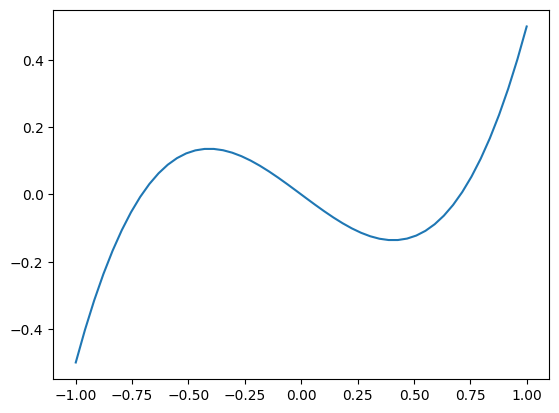

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x, y)
plt.show()

#**Indexación y segmentación**

Al igual que vimos con las listas de Python, podemos acceder a los elementos de los arrays y segmentarlos. Esta vez, tenemos más libertad ya que los arrays pueden ser multidimensionales. Como ejemplo inicial, intentemos rellenar algunas regiones diferentes de un array cero.

In [11]:
Z = np.zeros((10, 10))
Z[2, 1] = 1.0
Z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
Z = np.zeros((10, 10))
Z[3, :] = 1.0
Z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
Z = np.zeros((10, 10))
Z[:, 3] = 1.0
Z

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [14]:
Z = np.zeros((10, 10))
Z[4, :] += 1.0
Z[:, 3] += 1.0
Z

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 2., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

Al igual que con las listas, también puedo tomar una porción de una matriz. Esta vez las porciones se pueden combinar por dimensión.

In [15]:
Z = np.zeros((10, 10))
Z[3:7, 5:8] = 1.0
Z

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Por último, la secuencia funciona igual que antes. Por ejemplo, si quiero una secuencia alterna de 1 y -1, puedo usar:

In [16]:
x = np.empty(12)
x[::2] = 1.0
x[1::2] = -1.0
x

array([ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.])

**Ejercicio 1**



1.   Crear una subdivisión uniforme del intervalo -1.3 a 2.5 con 64 subdivisiones.
2.   Generar una matriz de longitud 3n rellena con el patrón cíclico 1, 2, 3. Nota: n es un entero dado por el usuario.
3.   Crear una matriz de los 10 primeros enteros impares.
4.   Crear una matriz de 10 x 10 ceros y luego «enmarcarla» con un borde de unos.
5.   Crear una matriz de 8 x 8 con un patrón de tablero de ajedrez de ceros y unos utilizando un enfoque de rebanar + encadenar.

In [ ]:
# Inserte su código aquí

#**Operaciones con matrices**

Ya hemos insinuado algunas operaciones artiméticas básicas utilizando linspace. Resulta que éstas funcionan en general para matrices. También veremos que muchas funciones estándar también tienen versiones «vectorizadas» que funcionan con matrices.

In [17]:
A = np.array([
    [1., 2., 3.],
    [4., 5., 6.],
])

B = np.array([
    [1., 5., 2.],
    [6., 4., 2.],
])

In [18]:
A + B

array([[ 2.,  7.,  5.],
       [10.,  9.,  8.]])

In [19]:
A - B

array([[ 0., -3.,  1.],
       [-2.,  1.,  4.]])

In [20]:
A * B

array([[ 1., 10.,  6.],
       [24., 20., 12.]])

Observe que se trata de una multiplicación por entradas. ¿Quizá no es lo que esperabas? Para realizar una multiplicación de tipo matricial, utilizaremos la función punto. Esto funciona tanto para la multiplicación matriz-vector como matriz-matriz.

In [21]:
A = np.array([
    [1., 4., 2.],
    [5., 2., 1.],
    [6., 2., 1.],
])

x = np.array([1., 2., 3.])

np.dot(A, x)

array([15., 12., 13.])

In [22]:
B = np.array([
    [1., 4., 1.],
    [2., 1., 5.],
    [3., 3., 9.],
])

np.dot(A, B)

array([[15., 14., 39.],
       [12., 25., 24.],
       [13., 29., 25.]])

Resulta que las matrices también son un poco más «inteligentes» que esto, y soportan una característica llamada difusión que permite automáticamente que ciertas matrices de diferentes formas se «estiren» para ajustarse a otra forma.

Para usos muy sofisticados, esto puede ser difícil de hacer bien, así que no vamos a entrar en ello en profundidad aquí. Sin embargo, es útil en casos sencillos que veremos aquí:

In [23]:
A + 3.0 # added to each entry

array([[4., 7., 5.],
       [8., 5., 4.],
       [9., 5., 4.]])

In [24]:
v = np.array([1., 4., 3.])
A + v # added to each row

array([[2., 8., 5.],
       [6., 6., 4.],
       [7., 6., 4.]])

In [25]:
v = np.array([1., 2., 3.])
w = np.array([10., 20., 30.])
v[:, np.newaxis] + w[np.newaxis, :] # all pairs sum

array([[11., 21., 31.],
       [12., 22., 32.],
       [13., 23., 33.]])

Como ya se ha mencionado, muchas funciones comunes están disponibles en forma «vectorizada».

In [26]:
x = np.linspace(-5, 5, 100)
y = np.sin(2*np.pi*x) * x
print(y)

[-6.12323400e-15 -2.90464996e+00 -4.58160166e+00 -4.43864021e+00
 -2.60618422e+00  1.42615459e-01  2.71615312e+00  4.13770624e+00
  3.91587234e+00  2.21171244e+00 -2.53055033e-01 -2.49972959e+00
 -3.68110443e+00 -3.40059917e+00 -1.84197448e+00  3.31255908e-01
  2.25623854e+00  3.21324035e+00  2.89428362e+00  1.49787883e+00
 -3.77219937e-01 -1.98659109e+00 -2.73557709e+00 -2.39836717e+00
 -1.18028043e+00  3.91013556e-01  1.69174879e+00  2.24959419e+00
  1.91426741e+00  8.89979363e-01 -3.72767603e-01 -1.37272188e+00
 -1.75678516e+00 -1.44337567e+00 -6.27719525e-01  3.22677043e-01
  1.03056760e+00  1.25865502e+00  9.87054792e-01  3.94187453e-01
 -2.41000594e-01 -6.66388378e-01 -7.56717681e-01 -5.46636773e-01
 -1.90011191e-01  1.28060253e-01  2.81329944e-01  2.52493467e-01
  1.23420599e-01  1.57592649e-02  1.57592649e-02  1.23420599e-01
  2.52493467e-01  2.81329944e-01  1.28060253e-01 -1.90011191e-01
 -5.46636773e-01 -7.56717681e-01 -6.66388378e-01 -2.41000594e-01
  3.94187453e-01  9.87054

*Puedes ver que esto calcula el seno en cada valor de x. Aunque podríamos hacer lo mismo utilizando una lista, este enfoque es mucho más rápido (y posiblemente más sencillo una vez que te acostumbras). Para comprobarlo, vamos a representar gráficamente la función:*

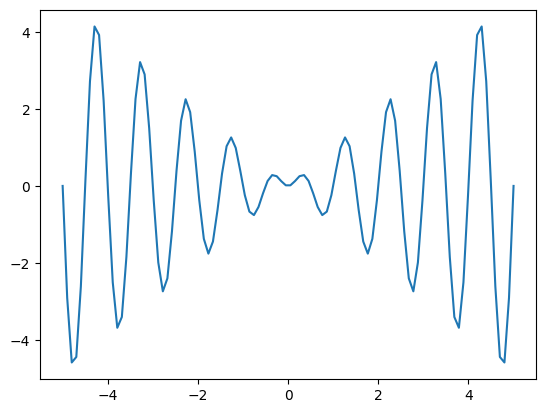

In [27]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x, y)
plt.show()

#**Ejercicio 2**



1.   Intenta utilizar la función $dot$ en un ejemplo vector-vector, matriz-vector y matriz-matriz. (Puede parecer sencillo, pero es bueno ver cómo difieren los resultados en cada caso).
2.   Crea un gráfico de $x^2⋅sin(1/x^2)+x$ en el intervalo $[-1,1]$ utilizando $250$ puntos. Recuerda etiquetar los ejes.
3. Crea un diagrama semilogarítmico de la diferencia relativa de $1/(1+x^2)$ y $1/x^2$ en el intervalo $[5,25]$. (La diferencia relativa de los números a y b viene dada por $|1-a/b|$. Esto proporciona un mejor sentido del error relativo al orden de magnitudes de a y b.)
4. Se ha mencionado que muchas funciones comunes están disponibles en forma vectorizada. Resulta que Scipy también tiene muchas funciones especiales menos comunes. ¡Echa un vistazo a la extensa lista aquí! Intenta buscar algunas interesantes que reconozcas (¡o quizás no reconozcas!) e introduce algunos números o trazalos.

In [28]:
# Inserta tu código aquí!

Trabajando con Arrays de Mayor Dimensión
Esto es bueno, pero el poder de Numpy realmente comienza a mostrar en grandes conjuntos de datos. Vamos a dar un paso de 1d a 2d cálculos. Como ejemplo inicial, nos gustaría evaluar y trazar la función f(x,y)=x2-y2
  en el dominio [-2,2]×[-2,2].
 .

Para ello, necesitamos el análogo del linspace en dimensiones superiores. Lo formaremos utilizando una nueva función llamada meshgrid.

In [29]:
x, y = np.meshgrid(np.linspace(-2, 2, 100),
                   np.linspace(-2, 2, 100))

f = x**2 - y**2

¿Cómo se traza esto? Introduciremos una nueva función de trazado llamada pcolormesh.

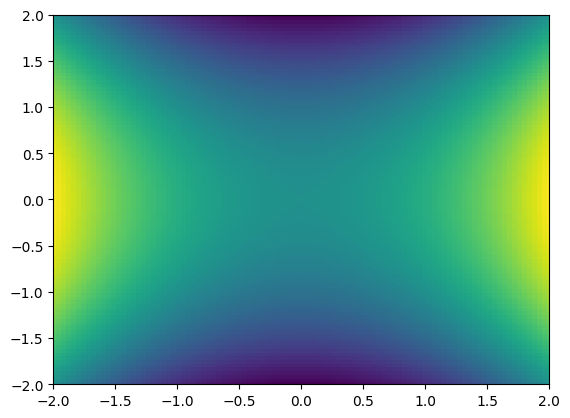

In [30]:
plt.figure()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.pcolormesh(x, y, f)
plt.show()

Es un buen comienzo. Sin embargo, hay algo estéticamente insatisfactorio... no destaca bien un aspecto importante de la función... el conjunto cero. Vamos a ver cómo podemos hacer un cambio rápido para mejorar esto.

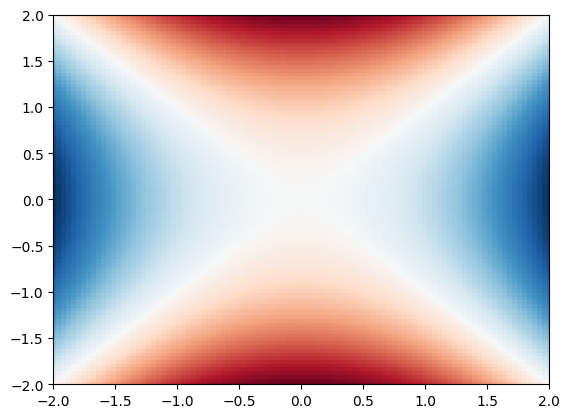

In [31]:
plt.figure()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.pcolormesh(x, y, f, cmap='RdBu')
plt.show()

Por otro lado, Matplotlib admite varios mapas de colores diferentes. Algunos de ellos tienen propósitos particulares. Hay tres clases generales llamadas secuencial, divergente y cualitativa. En este caso, estoy usando el hecho de que los mapas de colores divergentes son buenos para resaltar un valor central distinto en un conjunto de datos. Si te interesa, puedes aprender más sobre esto [aquí](http://matplotlib.org/users/colormaps.html).

#**Ejercicio 3**



1.   Crea un diagrama de colores de $sin(x)sin(y)$ en el intervalo $[-\pi,\pi]×[-\pi,\pi]$
2.   Crea una función que cree una matriz $n×n$ con $(i,j)$ -casillas igual a $i+j$.

In [32]:
# Inserte su código aquí

#**Manipulación de matrices**

Cuando se trabaja con matrices, no es raro tener que pasar algún tiempo para conseguir las cosas en el derecho «forma» o formato que desee. Numpy proporciona algunas funciones que ayudan con este tipo de cosas. Las dos primeras que veremos tienen que ver con la remodelación de un array.

In [33]:
A = np.arange(1, 10)
print(A)
print(A.shape)

[1 2 3 4 5 6 7 8 9]
(9,)


In [34]:
B = A.reshape(3, 3)
print(B)
print(B.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


Puedes ver que hemos tomado nuestro array de 9 elementos y lo hemos «envuelto» en un array de 3 por 3. Para deshacer esto, podemos utilizar "reshape" de nuevo, o podemos utilizar el más común "ravel":

In [35]:
print(np.ravel(B))
print(B.ravel()) # equivalent but a little shorter.

[1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7 8 9]


También es habitual tener varias matrices diferentes que quieres fusionar o «apilar» de una forma u otra. Veamos cómo apilar matrices «verticalmente», «horizontalmente» y «por columnas».

In [36]:
A = np.array([1., 2., 3.])
B = np.array([4., 1., 2.])

In [38]:
np.vstack([A, B])

array([[1., 2., 3.],
       [4., 1., 2.]])

In [39]:
np.hstack([A, B])

array([1., 2., 3., 4., 1., 2.])

In [41]:
np.column_stack([A, B])

array([[1., 4.],
       [2., 1.],
       [3., 2.]])

#**Más operaciones con matrices**

Aparte de las operaciones de tipo aritmético, Numpy también proporciona muchas otras cosas como encontrar el valor mínimo o máximo en un array, ordenar arrays, sumar todas las entradas de un array y mucho, mucho más. Echemos un vistazo a algunos de los conceptos básicos.

In [42]:
A = np.random.randint(1, 10, 5)
A

array([9, 5, 8, 1, 5])

In [43]:
print(np.min(A))
print(np.max(A))

1
9


In [44]:
np.sort(A)

array([1, 5, 5, 8, 9])

Una variación interesante de éstos viene dada por la versión «argumento». En lugar de elegir el mínimo, el máximo o la ordenación, podemos calcular los índices que surgirían de ellos.

In [45]:
print(np.argmin(A))
print(np.argmax(A))
print(np.argsort(A))

3
0
[3 1 4 2 0]


#**Ejercicio 4**

1.   Evaluar $cos$ y $sin$ en el intervalo $[0,1]$ y luego apila los resultados en una matriz alta cuyas filas sean las entradas $(cos(x),sin(x))$ entradas.
2.   Crea una matriz aleatoria de $3×5$ usando la función $np.random.rand(3, 5)$ y calcula: la suma de todas las entradas, la suma de las filas y la suma de las columnas. *(Al igual que sorted tenía un argumento opcional $key=$, muchas funciones Numpy tienen un argumento opcional $axis=$).*
3. Crear una matriz aleatoria de $5×5$ utilizando la función $np.random.rand(5, 5)$. Queremos ordenar las filas según la segunda columna. Intenta combinar array $slicing + argsort + indexing$ para hacerlo.

In [46]:
# Inserta tu código aquí

# **More Advanced Indexing**

As a closing topic, let's take a second look at how we can index elements in an array. This time, we're going to use an array to index another.

In [47]:
A = np.arange(1, 10)**2
A

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

In [48]:
i = np.array([1, 5, 3, 2, 3, 1])
A[i]

array([ 4, 36, 16,  9, 16,  4])

También puedo hacerlo en múltiples dimensiones.

In [49]:
A = np.zeros((5, 5))
i = np.arange(5)
A[i, i] = 1.0
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [50]:
A = np.arange(1, 10).reshape(3, 3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Por último, ¡incluso puedo indexar utilizando matrices multidimensionales!

In [51]:

i = np.array([
    [0, 0],
    [1, 1],
])

j = np.array([
    [0, 1],
    [2, 0],
])

A[i, j]

array([[1, 2],
       [6, 4]])

Sin embargo, hay que tener cuidado para utilizarlo correctamente... Como esto es sólo una introducción, dejaremos esto como un vistazo a lo que está por venir.